In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

import nltk
from gensim.utils import simple_preprocess

nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/marcus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
grey = (187/255, 187/255, 187/255)
darkgreen = (51/255, 117/255, 56/255)
teal = (93/255, 168/255, 153/255)
blue = (148/255, 203/255, 236/255)
yellow = (220/255, 205/255, 125/255)
red = (168/255, 96/255, 93/255)
pale_yellow = (164/255, 168/255, 93/255)

color_pallete = sns.color_palette([grey, darkgreen, teal, blue, yellow, red, pale_yellow])

In [5]:
feedback_df = pd.read_csv('../Menagerie/data/grades.csv', index_col=0)
feedback_df

,assignment_number,comments,skill,participant_id,batch,grade
0,18.0,The code use meaningful identifier names and a...,Readability,15,1,B+
1,620.0,Code is well organized into logical classes an...,Readability,15,1,A+
2,466.0,"The code is well-organized, consistently inden...",Readability,15,1,A-
3,591.0,The code is well organized and readable. Inden...,Readability,15,1,A-
4,587.0,The code is well organized and readable. Inden...,Readability,15,1,A-
...,...,...,...,...,...,...
15,58.0,NaN,Documentation,14,1,A++
16,353.0,NaN,Documentation,14,1,A++
17,422.0,NaN,Documentation,14,1,A++
18,480.0,NaN,Documentation,14,1,A++


# Consistency
## Individual graders

In [6]:
DUPLICATE_MAP = {
    680: 144,
    681: 559,
    682: 97,
    683: 358,
    684: 389,
    685: 160,
    686: 176
}

In [7]:
intra_rater_df = feedback_df[feedback_df['assignment_number'].isin(list(DUPLICATE_MAP.keys())+list(DUPLICATE_MAP.values()))][['assignment_number', 'skill', 'participant_id', 'batch', 'comments']]
intra_rater_df.to_csv('../data/intra_rater.csv', index=False)
intra_rater_df

,assignment_number,skill,participant_id,batch,comments
12,358.0,Readability,15,1,The code is generally clean and organized with...
12,358.0,Correctness,15,1,All of the base tasks are completed - the simu...
12,358.0,Code Elegance,15,1,The code demonstrates good use of classes and ...
12,358.0,Documentation,15,1,"Most classes and functions have clear, useful ..."
0,160.0,Readability,24,1,The student used indentation appropriately and...
...,...,...,...,...,...
19,144.0,Documentation,1,1,Code is documented well.
12,358.0,Readability,14,1,there are a few instances where naming consist...
12,358.0,Correctness,14,1,NaN
12,358.0,Code Elegance,14,1,NaN



### Length of comments

In [8]:
intra_rater_df['comments'] = intra_rater_df['comments'].fillna('')
intra_rater_df['length'] = intra_rater_df['comments'].apply(lambda comment: len(simple_preprocess(comment)))
intra_rater_df

,assignment_number,skill,participant_id,batch,comments,length
12,358.0,Readability,15,1,The code is generally clean and organized with...,19
12,358.0,Correctness,15,1,All of the base tasks are completed - the simu...,82
12,358.0,Code Elegance,15,1,The code demonstrates good use of classes and ...,33
12,358.0,Documentation,15,1,"Most classes and functions have clear, useful ...",21
0,160.0,Readability,24,1,The student used indentation appropriately and...,11
...,...,...,...,...,...,...
19,144.0,Documentation,1,1,Code is documented well.,4
12,358.0,Readability,14,1,there are a few instances where naming consist...,12
12,358.0,Correctness,14,1,,0
12,358.0,Code Elegance,14,1,,0


In [9]:
pivot = intra_rater_df.pivot(index=['skill', 'participant_id'], columns='batch', values='length').reset_index()
pivot.columns = ['skill', 'participant_id', 'length_1', 'length_2']

pivot['distance'] = abs(pivot['length_1'] - pivot['length_2'])
pivot

,skill,participant_id,length_1,length_2,distance
0,Code Elegance,1,29,10,19
1,Code Elegance,2,15,14,1
2,Code Elegance,3,10,10,0
3,Code Elegance,4,19,4,15
4,Code Elegance,5,0,0,0
...,...,...,...,...,...
107,Readability,24,11,11,0
108,Readability,25,0,0,0
109,Readability,26,0,0,0
110,Readability,27,12,14,2


In [10]:
print(f"Count missing - Correctness: {pivot[(pivot['skill'] == 'Correctness') & (pivot['length_1'] == 0) & (pivot['length_2'] == 0)].shape[0]}")
print(f"Count missing - Code Elegance: {pivot[(pivot['skill'] == 'Code Elegance') & (pivot['length_1'] == 0) & (pivot['length_2'] == 0)].shape[0]}")
print(f"Count missing - Readability: {pivot[(pivot['skill'] == 'Readability') & (pivot['length_1'] == 0) & (pivot['length_2'] == 0)].shape[0]}")
print(f"Count missing - Documentation: {pivot[(pivot['skill'] == 'Documentation') & (pivot['length_1'] == 0) & (pivot['length_2'] == 0)].shape[0]}")

print(f"Count same - Correctness: {pivot[(pivot['skill'] == 'Correctness') & (pivot['length_1'] != 0) & (pivot['length_2'] != 0) & (pivot['distance'] == 0)].shape[0]}")
print(f"Count same - Code Elegance: {pivot[(pivot['skill'] == 'Code Elegance') & (pivot['length_1'] != 0) & (pivot['length_2'] != 0) & (pivot['distance'] == 0)].shape[0]}")
print(f"Count same - Readability: {pivot[(pivot['skill'] == 'Readability') & (pivot['length_1'] != 0) & (pivot['length_2'] != 0) & (pivot['distance'] == 0)].shape[0]}")
print(f"Count same - Documentation: {pivot[(pivot['skill'] == 'Documentation') & (pivot['length_1'] != 0) & (pivot['length_2'] != 0) & (pivot['distance'] == 0)].shape[0]}")

print(f"Average Dist - Correctness: {pivot[(pivot['skill'] == 'Correctness')]['distance'].mean():.2f}")
print(f"Average Dist - Code Elegance: {pivot[(pivot['skill'] == 'Code Elegance')]['distance'].mean():.2f}")
print(f"Average Dist - Readability: {pivot[(pivot['skill'] == 'Readability')]['distance'].mean():.2f}")
print(f"Average Dist - Documentation: {pivot[(pivot['skill'] == 'Documentation')]['distance'].mean():.2f}")

Count missing - Correctness: 11
Count missing - Code Elegance: 11
Count missing - Readability: 11
Count missing - Documentation: 10
Count same - Correctness: 2
Count same - Code Elegance: 2
Count same - Readability: 5
Count same - Documentation: 2
Average Dist - Correctness: 4.57
Average Dist - Code Elegance: 5.82
Average Dist - Readability: 3.11
Average Dist - Documentation: 3.64


In [11]:
intra_rater_df[(intra_rater_df['skill'] == 'Documentation') & (intra_rater_df['participant_id'] == 10)]

,assignment_number,skill,participant_id,batch,comments,length
7,97.0,Documentation,10,1,This submission is completely identical to the...,13
14,682.0,Documentation,10,2,This submission is completely identical to the...,13


In [12]:
NOTICED_DUP = [1, 2, 10, 11, 20, 25]

In [13]:
sns.set(rc={'text.usetex': True})

def underline(input):
    return r'\underline{%s}' %input

underline(10)

'\\underline{10}'

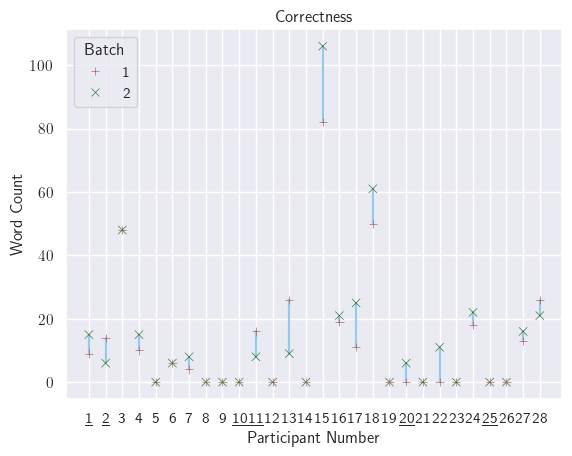

In [14]:
dist_plt = sns.scatterplot(intra_rater_df[(intra_rater_df['skill'] == 'Correctness')], x='participant_id', y='length', style='batch', hue='batch', palette=sns.color_palette([red, darkgreen]), markers=['+', 'x'], zorder=5)

for index, row in intra_rater_df[intra_rater_df['skill'] == 'Correctness'].iterrows():
    participant_id = row['participant_id']
    length_1 = intra_rater_df[(intra_rater_df['skill'] == 'Correctness') & (intra_rater_df['participant_id'] == participant_id) & (intra_rater_df['batch'] == 1)]['length']

    length_2 = intra_rater_df[(intra_rater_df['skill'] == 'Correctness') & (intra_rater_df['participant_id'] == participant_id) & (intra_rater_df['batch'] == 2)]['length']

    line = dist_plt.plot([participant_id, participant_id], [length_1, length_2])
    plt.setp(line, color=blue)

dist_plt.set(ylabel='Word Count', xlabel='Participant Number', title='Correctness', xticks=intra_rater_df['participant_id'].unique())
dist_plt.legend(title='Batch', loc='upper left')
temp_ticks = dist_plt.get_xticks()
temp_ticks = [underline(x) if x in NOTICED_DUP else x for x in temp_ticks]
dist_plt.set_xticklabels(temp_ticks)

dist_plt.get_figure().savefig('plots/feedback_correctness_distance.pdf', bbox_inches='tight')

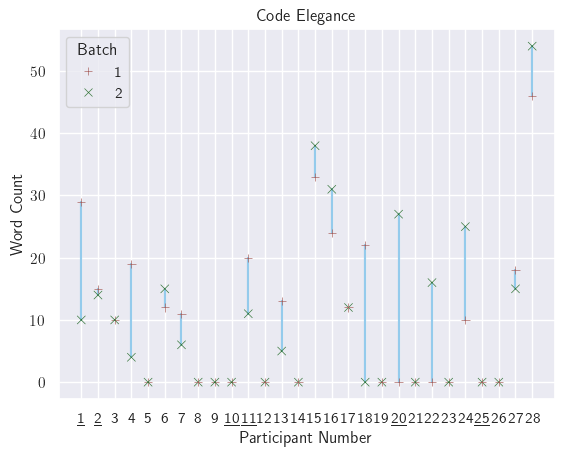

In [15]:
dist_plt = sns.scatterplot(intra_rater_df[(intra_rater_df['skill'] == 'Code Elegance')], x='participant_id', y='length', style='batch', hue='batch', palette=sns.color_palette([red, darkgreen]), markers=['+', 'x'], zorder=5)

for index, row in intra_rater_df[intra_rater_df['skill'] == 'Code Elegance'].iterrows():
    participant_id = row['participant_id']
    length_1 = intra_rater_df[(intra_rater_df['skill'] == 'Code Elegance') & (intra_rater_df['participant_id'] == participant_id) & (intra_rater_df['batch'] == 1)]['length']

    length_2 = intra_rater_df[(intra_rater_df['skill'] == 'Code Elegance') & (intra_rater_df['participant_id'] == participant_id) & (intra_rater_df['batch'] == 2)]['length']

    line = dist_plt.plot([participant_id, participant_id], [length_1, length_2])
    plt.setp(line, color=blue)

dist_plt.set(ylabel='Word Count', xlabel='Participant Number', title='Code Elegance', xticks=intra_rater_df['participant_id'].unique())
dist_plt.legend(title='Batch')
temp_ticks = dist_plt.get_xticks()
temp_ticks = [underline(x) if x in NOTICED_DUP else x for x in temp_ticks]
dist_plt.set_xticklabels(temp_ticks)

dist_plt.get_figure().savefig('plots/feedback_code_elegance_distance.pdf', bbox_inches='tight')

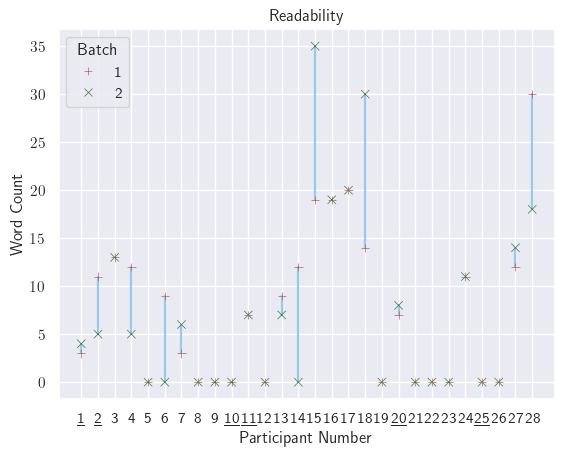

In [16]:
dist_plt = sns.scatterplot(intra_rater_df[(intra_rater_df['skill'] == 'Readability')], x='participant_id', y='length', style='batch', hue='batch', palette=sns.color_palette([red, darkgreen]), markers=['+', 'x'], zorder=5)

for index, row in intra_rater_df[intra_rater_df['skill'] == 'Readability'].iterrows():
    participant_id = row['participant_id']
    length_1 = intra_rater_df[(intra_rater_df['skill'] == 'Readability') & (intra_rater_df['participant_id'] == participant_id) & (intra_rater_df['batch'] == 1)]['length']

    length_2 = intra_rater_df[(intra_rater_df['skill'] == 'Readability') & (intra_rater_df['participant_id'] == participant_id) & (intra_rater_df['batch'] == 2)]['length']

    line = dist_plt.plot([participant_id, participant_id], [length_1, length_2])
    plt.setp(line, color=blue)

dist_plt.set(ylabel='Word Count', xlabel='Participant Number', title='Readability', xticks=intra_rater_df['participant_id'].unique())
dist_plt.legend(title='Batch', loc='upper left')

temp_ticks = dist_plt.get_xticks()
temp_ticks = [underline(x) if x in NOTICED_DUP else x for x in temp_ticks]
dist_plt.set_xticklabels(temp_ticks)

dist_plt.get_figure().savefig('plots/feedback_readability_distance.pdf', bbox_inches='tight')

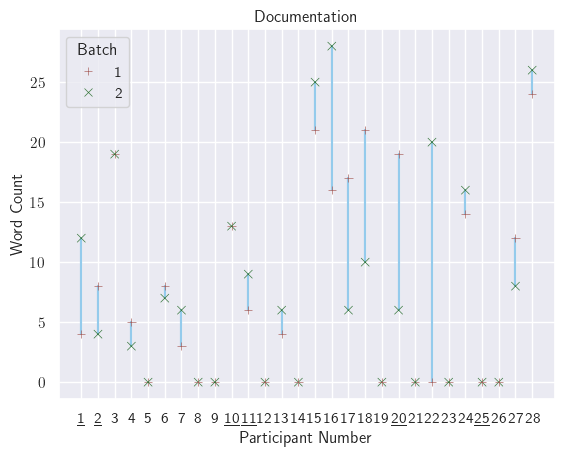

In [17]:
dist_plt = sns.scatterplot(intra_rater_df[(intra_rater_df['skill'] == 'Documentation')], x='participant_id',  y='length', style='batch', hue='batch', palette=sns.color_palette([red, darkgreen]), markers=['+', 'x'], zorder=5)

for index, row in intra_rater_df[intra_rater_df['skill'] == 'Documentation'].iterrows():
    participant_id = row['participant_id']
    length_1 = intra_rater_df[(intra_rater_df['skill'] == 'Documentation') & (intra_rater_df['participant_id'] == participant_id) & (intra_rater_df['batch'] == 1)]['length']

    length_2 = intra_rater_df[(intra_rater_df['skill'] == 'Documentation') & (intra_rater_df['participant_id'] == participant_id) & (intra_rater_df['batch'] == 2)]['length']

    line = dist_plt.plot([participant_id, participant_id], [length_1, length_2])
    plt.setp(line, color=blue)

dist_plt.set(ylabel='Word Count', xlabel='Participant Number', title='Documentation', xticks=intra_rater_df['participant_id'].unique())
dist_plt.legend(title='Batch')
temp_ticks = dist_plt.get_xticks()
temp_ticks = [underline(x) if x in NOTICED_DUP else x for x in temp_ticks]
dist_plt.set_xticklabels(temp_ticks)

dist_plt.get_figure().savefig('plots/feedback_documentation_distance.pdf', bbox_inches='tight')
sns.set(rc={'text.usetex': False})

### Comment Similarity

In [18]:
sim_df = pd.read_csv('../data/similarity_analysis_output.csv')
sim_df

,assignment_number,skill,participant_id,feedback_1,feedback_2,sim
0,97.0,Code Elegance,11,Good usage of organism abstract class. animals...,"good abstraction level, code is not rewritten ...",0.475714
1,97.0,Correctness,11,unclear what the natural disasters do; they ju...,core and challenging tasks completed. added na...,0.522516
2,97.0,Documentation,10,This submission is completely identical to the...,This submission is completely identical to the...,0.899581
3,97.0,Documentation,11,documented well. every function is defined,documentation is clear and defines every class...,0.743613
4,97.0,Readability,11,code is clean and simple to read,code is clear and follows consistent structure,0.662336
...,...,...,...,...,...,...
64,559.0,Correctness,7,It is basically correct.,Some efforts have been put into this project.,0.078713
65,559.0,Documentation,6,Missing return and parameter comments for some...,Missing param comment in method header comments,0.660806
66,559.0,Documentation,7,Better than others.,"It is good, though not perfect.",0.454978
67,559.0,Readability,6,"Good variable naming, public used where could ...",No comment supplied,0.068642


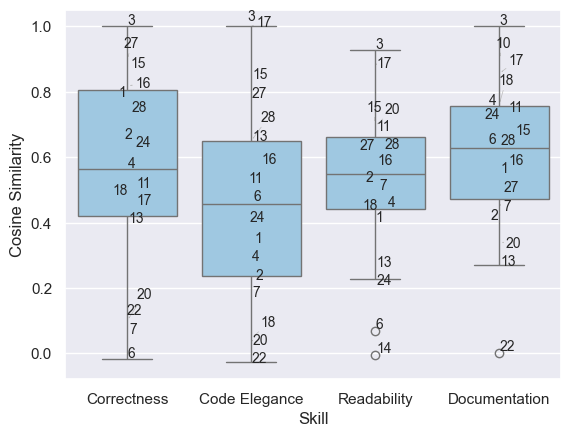

In [19]:
g = sns.boxplot(sim_df, x='skill', y='sim', color=blue, order=['Correctness', 'Code Elegance', 'Readability', 'Documentation'])

texts = [plt.text(sim_df["skill"][i], sim_df["sim"][i], str(sim_df["participant_id"][i]), fontsize=10) for i in range(len(sim_df["skill"]))]

adjust_text(
    texts,
    arrowprops=dict(arrowstyle="->", color=grey, lw=0.5)  # Optional arrows
)

g.set_xlabel('Skill')
g.set_ylabel('Cosine Similarity')

g.get_figure().savefig('plots/feedback_similarity_graph.pdf', bbox_inches='tight')

In [20]:
sim_average_df = sim_df[['skill', 'participant_id', 'sim']].groupby(['skill', 'participant_id']).sum()
means = sim_average_df.groupby(level='skill')['sim'].mean()
upper_quartiles = sim_average_df.groupby(level='skill')['sim'].quantile(0.75)
lower_quartiles = sim_average_df.groupby(level='skill')['sim'].quantile(0.25)

above_mean_counts = sim_average_df.groupby(level='skill').apply(lambda group: (group['sim'] > means[group.name]).sum())
above_uq_counts = sim_average_df.groupby(level='skill').apply(lambda group: (group['sim'] > upper_quartiles[group.name]).sum())
lower_lq_counts = sim_average_df.groupby(level='skill').apply(lambda group: (group['sim'] < lower_quartiles[group.name]).sum())

print(f'Means:  {means}')

print(f'Count of participants greater than mean: {above_mean_counts}')
print(f'Count of participants greater than UQ: {above_uq_counts}')
print(f'Count of participants lower than LQ: {lower_lq_counts}')

Means:  skill
Code Elegance    0.468429
Correctness      0.532037
Documentation    0.606132
Readability      0.508018
Name: sim, dtype: float64
Count of participants greater than mean: skill
Code Elegance     8
Correctness       9
Documentation    10
Readability      10
dtype: int64
Count of participants greater than UQ: skill
Code Elegance    4
Correctness      4
Documentation    5
Readability      4
dtype: int64
Count of participants lower than LQ: skill
Code Elegance    4
Correctness      4
Documentation    5
Readability      4
dtype: int64


In [21]:
sim_df[(sim_df['skill'] == 'Readability') & (sim_df['participant_id'] == 7)]

,assignment_number,skill,participant_id,feedback_1,feedback_2,sim
68,559.0,Readability,7,Easy to read.,"It is readable, though not perfect.",0.547646


### Topics

In [22]:
sns.set(rc={'text.usetex': True})

In [57]:
def generate_dominant_topic_plot(df, skill):

    df = df[df['assignment_number'].isin(list(DUPLICATE_MAP.keys())+list(DUPLICATE_MAP.values()))]
    df['batch'] = df['batch'].apply(lambda x: 'Batch ' + str(x))
    
    for i in range(1, 29):
        if i not in df['participant_id'].unique():
            df = pd.concat([df, pd.DataFrame([{'participant_id':i}])])

    df = df.sort_values('participant_id')

    g = sns.scatterplot(df, y='batch', x='participant_id', hue='Dominant_Topic', s=200, marker='s', palette=sns.color_palette([blue, darkgreen, grey, yellow]))
    g.set_ylim((-2,3))
    g.legend(title="Topics")
    g.set_xlabel('Participant ID')
    g.set_ylabel('Batch')
    g.set_title(skill)
    
    g.set(xticks=intra_rater_df['participant_id'].unique())
    
    temp_ticks = g.get_xticks()
    temp_ticks = [underline(x) if x in NOTICED_DUP else x for x in temp_ticks]
    g.set_xticklabels(temp_ticks)

    g.get_figure().set_size_inches(10, 3.8)
    g.get_figure().savefig(f'plots/intra_{skill}_topic.pdf', bbox_inches='tight')
    
    df_pivot = df.pivot(index='participant_id', columns='batch', values='Dominant_Topic')
    print(f"Count of same topic: {(df_pivot['Batch 1'] == df_pivot['Batch 2']).sum()}")
    print(f"Count of both missing: {df_pivot[df_pivot['Batch 1'].isna() & df_pivot['Batch 2'].isna()]['Batch 1'].fillna(1).sum()}")
    count_missing_given = df_pivot[df_pivot['Batch 1'].isna() & ~df_pivot['Batch 2'].isna()]['Batch 1'].fillna(1).sum()
    count_given_missing = df_pivot[~df_pivot['Batch 1'].isna() & df_pivot['Batch 2'].isna()]['Batch 2'].fillna(1).sum()
    print(f"Count of missing in one batch, but feedback in the other: {count_given_missing + count_missing_given}")
    # return df_pivot

/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_84679/646296465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['batch'] = df['batch'].apply(lambda x: 'Batch ' + str(x))
/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_84679/646296465.py:12: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  g = sns.scatterplot(df, y='batch', x='participant_id', hue='Dominant_Topic', s=200, marker='s', palette=sns.color_palette([blue, darkgreen, grey, yellow]))
/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_84679/646296465.py:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(c

Count of same topic: 11
Count of both missing: 11
Count of missing in one batch, but feedback in the other: 2


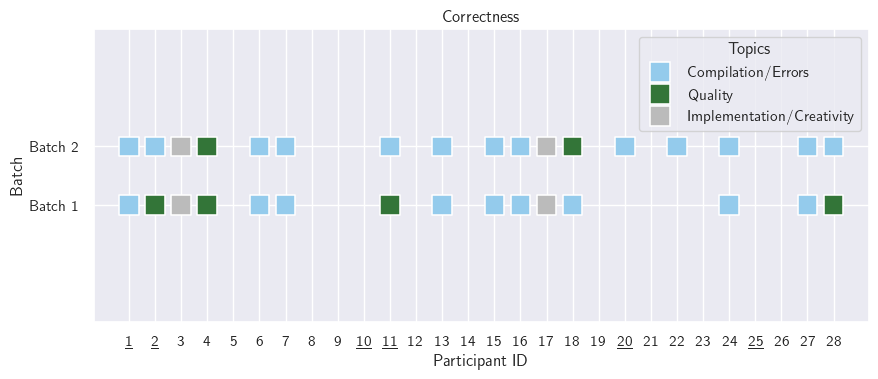

In [59]:
generate_dominant_topic_plot(pd.read_csv('../data/dominant_topics_correctness.csv'), 'Correctness')

/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_84679/646296465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['batch'] = df['batch'].apply(lambda x: 'Batch ' + str(x))
/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_84679/646296465.py:12: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  g = sns.scatterplot(df, y='batch', x='participant_id', hue='Dominant_Topic', s=200, marker='s', palette=sns.color_palette([blue, darkgreen, grey, yellow]))
/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_84679/646296465.py:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(c

Count of same topic: 9
Count of both missing: 11
Count of missing in one batch, but feedback in the other: 3


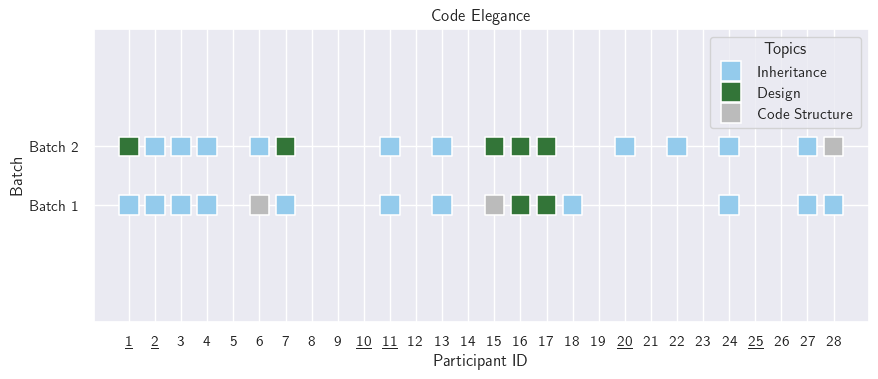

In [60]:
generate_dominant_topic_plot(pd.read_csv('../data/dominant_topics_code_elegance.csv'), 'Code Elegance')

/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_84679/646296465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['batch'] = df['batch'].apply(lambda x: 'Batch ' + str(x))
/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_84679/646296465.py:12: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.scatterplot(df, y='batch', x='participant_id', hue='Dominant_Topic', s=200, marker='s', palette=sns.color_palette([blue, darkgreen, grey, yellow]))
/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_84679/646296465.py:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(c

Count of same topic: 8
Count of both missing: 11
Count of missing in one batch, but feedback in the other: 2


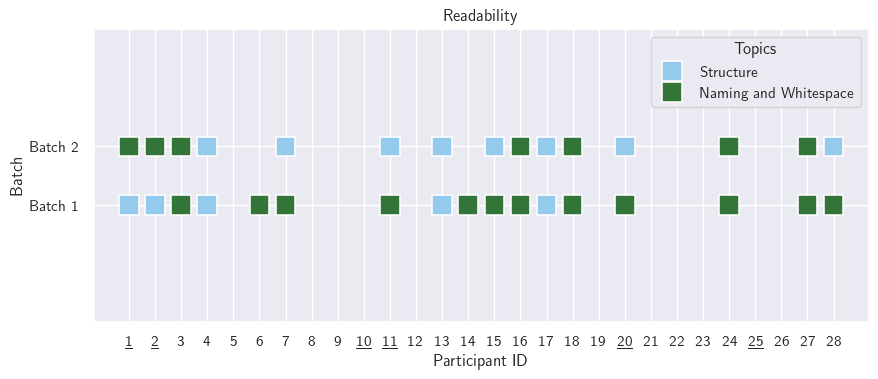

In [61]:
generate_dominant_topic_plot(pd.read_csv('../data/dominant_topics_readability.csv'), 'Readability')

/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_84679/646296465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['batch'] = df['batch'].apply(lambda x: 'Batch ' + str(x))
/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_84679/646296465.py:12: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.scatterplot(df, y='batch', x='participant_id', hue='Dominant_Topic', s=200, marker='s', palette=sns.color_palette([blue, darkgreen, grey, yellow]))


Count of same topic: 10
Count of both missing: 10
Count of missing in one batch, but feedback in the other: 1


/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_84679/646296465.py:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  print(f"Count of both missing: {df_pivot[df_pivot['Batch 1'].isna() & df_pivot['Batch 2'].isna()]['Batch 1'].fillna(1).sum()}")
/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_84679/646296465.py:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  count_missing_given = df_pivot[df_pivot['Batch 1'].isna() & ~df_pivot['Batch 2'].isna()]['Batch 1'].fillna(1).sum()


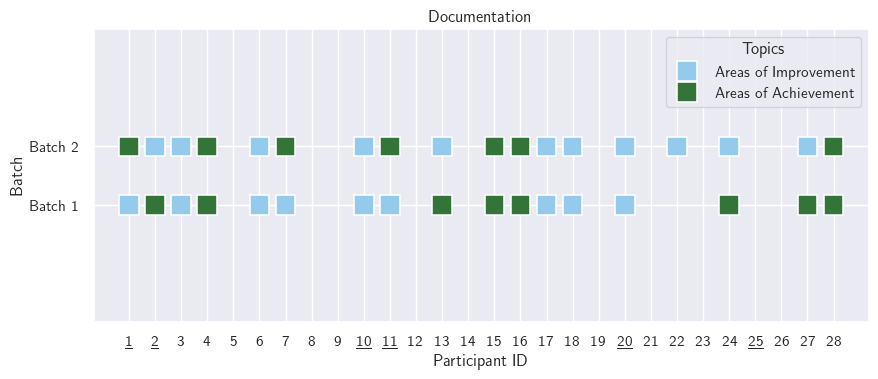

In [62]:
generate_dominant_topic_plot(pd.read_csv('../data/dominant_topics_documentation.csv'), 'Documentation')

In [63]:
sns.set(rc={'text.usetex': False})